In [ ]:
#Install the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = 'en', tweet_mode = 'extended')

#Print the last 5 tweets from the account
print("Show the 5 recents tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i+1

Show the 5 recents tweets: 

1)This is a sad day. Reversing Roe v. Wade is an unjust and unacceptable setback. And it puts women’s lives at risk, especially the most disadvantaged.

2)Through renewed investments in malaria and NTDs, we can help end these endemic diseases, and prevent future pandemics. https://t.co/Aw9fIJHr2H

3)Daniel Boakye of @TheENDFund has spent 45 years working on solutions for neglected tropical diseases, including river blindness. As he says, “We have the tools we need. The priority now is to deploy them in the right way to get to elimination.” https://t.co/Mzdh5sOoCr

4)When most people think about what produces greenhouse gas emissions, they think about cars and electricity. But they add up to only about one third of the total. Clean hydrogen could help eliminate the rest: https://t.co/CtB8gnMB2Z https://t.co/WUocOWxKcr

5)The Power by @NaomiAllthenews raises timely questions about the way people are connected by gender, family, community, and country. https:/

In [ ]:
#Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,This is a sad day. Reversing Roe v. Wade is an...
1,Through renewed investments in malaria and NTD...
2,Daniel Boakye of @TheENDFund has spent 45 year...
3,When most people think about what produces gre...
4,The Power by @NaomiAllthenews raises timely qu...


In [ ]:
#Clean the text

def cleanTxT(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @mentions
  text = re.sub(r'#', '', text)  #Removing the '#" symbol"
  text = re.sub(r'RT[\s]+','', text)  #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text)   #Remove the hyper link

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxT)

#Show the cleaned Text
df

,Tweets
0,This is a sad day. Reversing Roe v. Wade is an...
1,Through renewed investments in malaria and NTD...
2,Daniel Boakye of has spent 45 years working o...
3,When most people think about what produces gre...
4,The Power by raises timely questions about th...
...,...
95,The best way to prevent pneumonia is to vaccin...
96,Giving a TED talk is always a memorable (and n...
97,"Each day, polio workers around the world cross..."
98,Building a software company is nothing compare...


In [ ]:
#Create a function to get the subjectivity 

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,This is a sad day. Reversing Roe v. Wade is an...,0.833333,0.000000
1,Through renewed investments in malaria and NTD...,0.125000,0.000000
2,Daniel Boakye of has spent 45 years working o...,0.317857,0.092857
3,When most people think about what produces gre...,0.590000,0.173333
4,The Power by raises timely questions about th...,0.000000,0.000000
...,...,...,...
95,The best way to prevent pneumonia is to vaccin...,0.650000,1.000000
96,Giving a TED talk is always a memorable (and n...,0.750000,0.562500
97,"Each day, polio workers around the world cross...",0.000000,0.000000
98,Building a software company is nothing compare...,0.900000,0.500000


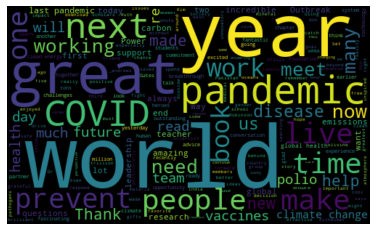

In [ ]:
#Plot the word cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,This is a sad day. Reversing Roe v. Wade is an...,0.833333,0.000000,Neutral
1,Through renewed investments in malaria and NTD...,0.125000,0.000000,Neutral
2,Daniel Boakye of has spent 45 years working o...,0.317857,0.092857,Positive
3,When most people think about what produces gre...,0.590000,0.173333,Positive
4,The Power by raises timely questions about th...,0.000000,0.000000,Neutral
...,...,...,...,...
95,The best way to prevent pneumonia is to vaccin...,0.650000,1.000000,Positive
96,Giving a TED talk is always a memorable (and n...,0.750000,0.562500,Positive
97,"Each day, polio workers around the world cross...",0.000000,0.000000,Neutral
98,Building a software company is nothing compare...,0.900000,0.500000,Positive


In [ ]:
# Print all of the positive tweets

j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j = j+1

1)Daniel Boakye of  has spent 45 years working on solutions for neglected tropical diseases, including river blindness. As he says, “We have the tools we need. The priority now is to deploy them in the right way to get to elimination.” 

2)When most people think about what produces greenhouse gas emissions, they think about cars and electricity. But they add up to only about one third of the total. Clean hydrogen could help eliminate the rest:  

3)Important guidance from  founder _hfillit outlining the path forward on Alzheimer’s: 
▪️ More – and better – biomarkers
▪️ Exploratory trials
▪️ Repurposed drugs


4)My advice is simple: read a lot and discover a skill you enjoy. For some, that means being great at science or a great communicator. There’s so much opportunity to do good in the world.

5)It made me think a lot about what I would tell my younger self. I remember this guy. A lot has changed since this photo, but I remember how excited I felt for the next chapter. 

6)I was recen

In [ ]:
#Print the negative tweets
# Print all of the positive tweets

j = 1
sortedDF_neg = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF_neg.shape[0]):
  if(sortedDF_neg['Analysis'][i] == 'Negative'):
    print(str(j) + ')' +sortedDF_neg['Tweets'][i])
    print()
    j = j+1

1)Yesterday, I had a chance to spend the day focusing on climate – and the innovations that can prevent the very worst effects of climate change. 

2)To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: 



<function matplotlib.pyplot.show>

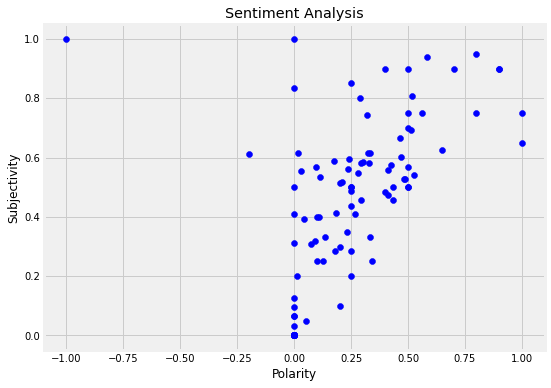

In [ ]:
#Plot the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show


In [ ]:
# Get the percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

print(round((ptweets.shape[0] / df.shape[0])*100, 1))

73.0


In [ ]:
# Get the percentage of negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

print(round((ntweets.shape[0] / df.shape[0])*100, 1))

2.0


<function matplotlib.pyplot.show>

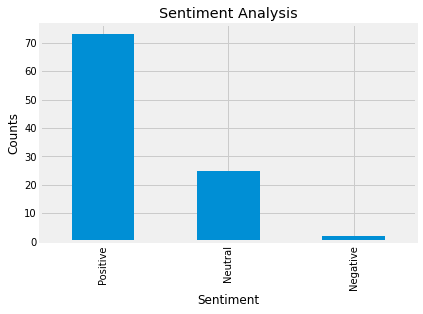

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

#Plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show